In [1]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from collections import Counter
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from nltk import word_tokenize
from matplotlib import cm
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from sklearn.feature_extraction.text import CountVectorizer

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

In [3]:
import pandas as pd
csv_path = 'online_retail_dataset.csv'
# Read the CSV directly into a Pandas DataFrame
df_raw = pd.read_csv(csv_path)


In [4]:
df_raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [5]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install counter

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for counter: filename=Counter-1.0.0-py3-none-any.whl size=5425 sha256=5ddba1988e25490823701e54bbda43bea72d076921cfa394ec837bdda0d975ab
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\77\be\84\2c532d945bc50658d417e935f5bd6f1a5fa99b226a5eb635b2
Successfully built counter
Note: you may need to restart the kernel to use updated packages.


### Exploratory Data Analysis

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
#To check missing values
df_raw.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df_raw.duplicated().sum()

5268

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


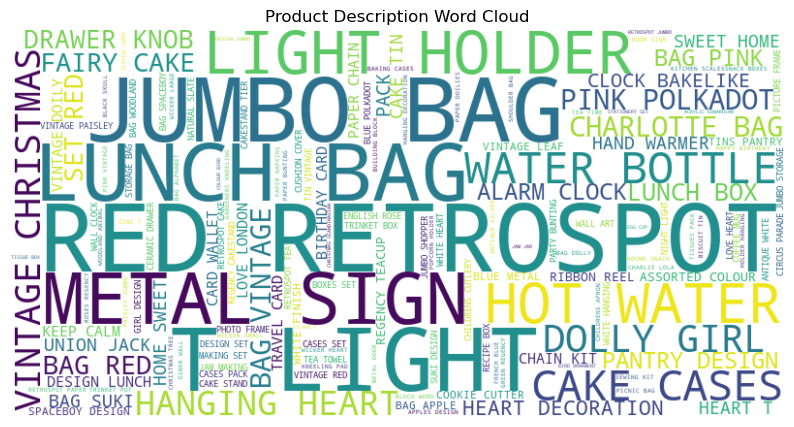

In [12]:
#Creating word cloud for description column by Concatenate all descriptions into a single string
description_text = ' '.join(df_raw['Description'].astype(str).tolist())

# Create a WordCloud object with parameters
custom_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150, contour_width=3, contour_color='steelblue')

# Generate the word cloud from the text
custom_wordcloud.generate(description_text)

# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(custom_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Product Description Word Cloud')

# Show the plot
plt.show()

In [13]:
stop_words_set = set(stopwords.words('english'))

# Function to preprocess text using TextBlob
def preprocess_text_textblob(text):
    blob = TextBlob(str(text).lower())
    words = [word for word in blob.words if word.isalnum() and word not in stop_words_set]
    return ' '.join(words)

# Function to find top common words
def find_top_common_words_textblob(text, n):
    processed_text = preprocess_text_textblob(text)
    word_counts = Counter(processed_text.split())
    
    top_words = word_counts.most_common(n)
    return top_words

# Assuming you have already defined 'df_raw'
# Convert the 'Description' column to strings before using str.cat
top_words_result_textblob = find_top_common_words_textblob(df_raw['Description'].astype(str).str.cat(sep=' '), n=10)

if top_words_result_textblob:
    print("Top 10 most common words:")
    for word, count in top_words_result_textblob:
        print(f"{word}: {count}")
        
    df_top_words_textblob = pd.DataFrame(top_words_result_textblob, columns=['Word', 'Count'])

Top 10 most common words:
set: 54599
bag: 51911
red: 42902
heart: 39163
retrospot: 35126
vintage: 33748
design: 30066
pink: 29543
christmas: 25131
box: 24462


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

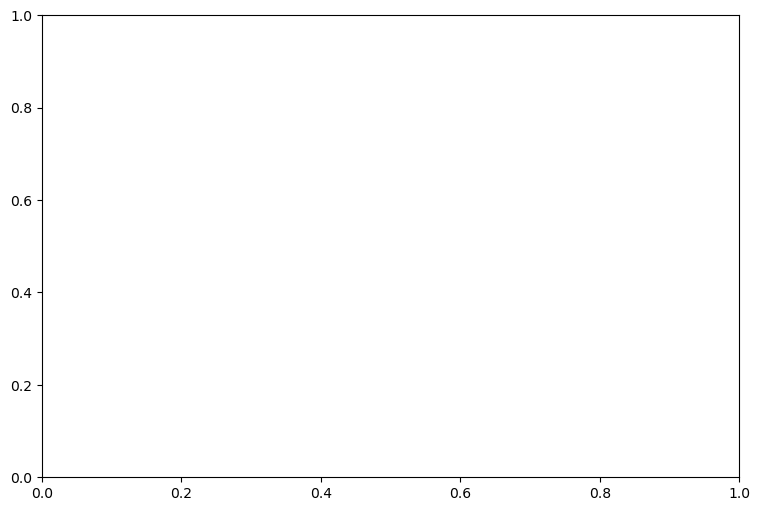

In [14]:
# Check if the DataFrame 'df_top_words_textblob' is not empty
if not df_top_words_textblob.empty:
    top_words_data = df_top_words_textblob.head(10)

    # Plotting vertical bar chart with different parameter names
    plt.figure(figsize=(9, 6))
    sns.barplot(x='Count', y='Word', hue='Word', data=top_words_data, palette='viridis', legend=False)
    plt.title('Top 10 Most Common Words')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
else:
    # Print a message if the DataFrame is empty
    print("DataFrame 'df_top_words' is empty.")

In [ ]:
# Function to process text
def process_string(input_string):
    # Check if the input is not null
    if pd.notna(input_string):
        # Tokenize, convert to lowercase, and remove stop words
        tokens_custom = word_tokenize(str(input_string).lower())
        tokens_custom = [word for word in tokens_custom if word.isalnum() and word not in stop_words_set]
        return ' '.join(tokens_custom)
    else:
        return ''

# Function to extract and print top bigrams and trigrams
def top_ngrams_string(data_col, top_n, ngram_range_custom=(1, 1)):
    # Process the text data in the specified column
    processed_strings = data_col.apply(process_string)
    
    # Use CountVectorizer to extract n-grams
    vectorizer_custom = CountVectorizer(ngram_range=ngram_range_custom)
    X_custom = vectorizer_custom.fit_transform(processed_strings)
    feature_names_custom = vectorizer_custom.get_feature_names_out()
    counts_custom = X_custom.sum(axis=0).A1
    
    # Get and print the top n-grams
    ngram_counts_custom = dict(zip(feature_names_custom, counts_custom))
    sorted_ngrams_custom = sorted(ngram_counts_custom.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_ngrams_custom


top_bigrams_string = top_ngrams_string(df_raw['Description'], 10, ngram_range_custom=(2, 2))
top_trigrams_string = top_ngrams_string(df_raw['Description'], 10, ngram_range_custom=(3, 3))

# Print the top bigrams
print("Top Bigrams:")
for bigram_string in top_bigrams_string:
    print(bigram_string)

# Print the top trigrams
print("\nTop Trigrams:")
for trigram_string in top_trigrams_string:
    print(trigram_string)


In [ ]:
# Assuming you have already defined 'df_raw' and 'top_bigrams_custom' and 'top_trigrams_custom'
df_bigrams_custom = pd.DataFrame(top_bigrams_string, columns=['Bigram', 'Count'])
df_trigrams_custom = pd.DataFrame(top_trigrams_string, columns=['Trigram', 'Count'])

plt.figure(figsize=(14, 8))

# Horizontal bar plot using seaborn for top bigrams
plt.subplot(1, 2, 1)
sns.barplot(x='Bigram', y='Count', data=df_bigrams_custom, palette='husl', hue='Bigram', dodge=False)
plt.title('Top Bigrams (Custom)')
plt.xticks(rotation=45, ha='right')

# Display values beside the bars for top bigrams
for index, value in enumerate(df_bigrams_custom['Count']):
    plt.text(index, value, str(value), ha='center', fontsize=10, color='white')

# Horizontal bar plot using seaborn for top trigrams
plt.subplot(1, 2, 2)
sns.barplot(x='Trigram', y='Count', data=df_trigrams_custom, palette='husl', hue='Trigram', dodge=False)
plt.title('Top Trigrams (Custom)')
plt.xticks(rotation=45, ha='right')

# Display values beside the bars for top trigrams
for index, value in enumerate(df_trigrams_custom['Count']):
    plt.text(index, value, str(value), ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()


In [ ]:
# Create a scatter plot of product prices against index
plt.figure(figsize=(8, 6))
plt.scatter(df_raw['UnitPrice'], df_raw.index, alpha=0.5, color='green')  # Use a different color, e.g., 'green'
plt.title('Scatter Plot of Product Prices')
plt.xlabel('Index')
plt.ylabel('Product Price')
plt.show()


In [ ]:
# Create a scatter plot of unitprice prices against index
plt.figure(figsize=(8, 6))
plt.scatter(df_raw['Quantity'], df_raw.index, alpha=0.5, color='orange')  # Use a different color, e.g., 'orange'
plt.title('Scatter Plot of Product Quantities')
plt.xlabel('Index')
plt.ylabel('Product Quantity')
plt.show()

In [ ]:
# Boxplot of Quantity using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw['Quantity'], vert=False, width=0.7, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Product Quantity')
plt.xlabel('Quantity')
plt.yticks([])  # Remove y-axis ticks since it's just one box
plt.show()


In [ ]:
# Boxplot of Quantity using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw['UnitPrice'], vert=False, width=0.7, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of UnitPrice')
plt.xlabel('UnitPrice')
plt.yticks([])  # Remove y-axis ticks since it's just one box
plt.show()


### DATA PREPROCESSING

In [ ]:
class DataPreprocessor:
    def __init__(self, df):
        # Initialize the DataPreprocessor with a DataFrame
        self.df = df
        self.df_processed = None  # Initialize df_processed attribute

    def preprocess_data(self):
        # Make a copy to avoid modifying the original dataframe
        self.df_processed = self.df.copy()
        
        # Strip whitespaces, remove duplicates, drop missing values, reset index
        self.df_processed['Description'] = self.df_processed['Description'].str.strip()
        self.df_processed.drop_duplicates(inplace=True)
        self.df_processed.dropna(axis=0, inplace=True)
        self.df_processed = self.df_processed.reset_index(drop=True)
        self.df_processed['InvoiceDate'] = pd.to_datetime(self.df_processed['InvoiceDate'])
        
        def remove_non_digit(s):
            # If str then remove and keep digit
            return ''.join(filter(str.isdigit, str(s)))

        # Apply the function to the 'InvoiceNo' and 'StockCode' columns
        self.df_processed['InvoiceNo'] = self.df_processed['InvoiceNo'].apply(remove_non_digit)
        self.df_processed['StockCode'] = self.df_processed['StockCode'].apply(remove_non_digit)
        
        self.df_processed = self.df_processed[(self.df_processed['Quantity'] >= 0) & (self.df_processed['UnitPrice'] >= 0)]

In [ ]:
data_preprocessor = DataPreprocessor(df_raw)

# Preprocess the data
data_preprocessor.preprocess_data()

# Access the preprocessed DataFrame
df_processed = data_preprocessor.df_processed

In [ ]:
df_processed

### FEATURE ENGINEERING

In [ ]:
# Function that creates new column region from the country present in the dataframe
def region(country):
    north_america = ['USA', 'Canada']
    europe = ['United Kingdom', 'Germany', 'France', 'Spain', 'Belgium', 'Switzerland', 'Portugal', 'Italy', 'Finland', 'Norway', 'Netherlands', 'Austria', 'Sweden', 'Channel Islands', 'Denmark','Poland', 'European Community', 'Iceland']
    south_america = ['Brazil']
    africa = ['RSA']
    asia = ['Japan', 'Cyprus', 'Greece', 'Israel', 'EIRE', 'Malta', 'United Arab Emirates', 'Bahrain', 'Singapore', 'Lebanon', 'Czech Republic', 'Saudi Arabia', 'Lithuania']

    if country in north_america: 
        return 'North America'
    elif country in europe:
        return 'Europe'
    elif country in south_america:
        return 'South America'
    elif country in africa:
        return 'Africa'
    elif country in asia:
        return 'Asia'
    else:
        return 'Other'

In [ ]:
#calling function to create new column
df_processed['Region'] = df_processed['Country'].apply(region)

In [ ]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='Region', data=df_processed, hue='Region', palette='viridis')

# Display value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize labels and title
plt.title('Distribution of Items Sold by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_processed is your preprocessed DataFrame with the 'Region' and 'Quantity' columns
# Filter DataFrame for positive quantity
df_positive_quantity = df_processed[df_processed['Quantity'] >= 0]

# Exclude the 'Europe' region
df_non_europe = df_positive_quantity[df_positive_quantity['Region'] != 'Europe']

# Specify a different color palette (for example, 'muted')
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='Region', data=df_non_europe, hue='Region', palette='muted')

# Display value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize labels and title
plt.title('Distribution of Items Sold by Region (Excluding Europe)')
plt.xlabel('Region')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


### MARKET BASKET ANALYSIS USING FP-GROWTH ALGORITHM

In [ ]:
#Creating a copy of processed dataframe
df_fp = df_processed.copy()

In [ ]:
df_fp.describe()

In [ ]:
#Creating a basket by grouping by InvoiceNo, Description with Quantity  and setting Invoice No as index
basket_fp = (df_fp.groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

In [ ]:
basket_fp

In [ ]:
# Changing values to boolean type using a boolean condition
basketfp_set = basket_fp.apply(lambda x: x > 0).astype(bool)


In [ ]:
basketfp_set.head()

In [ ]:
frequent_items_fp = fpgrowth(basketfp_set, min_support=0.02, use_colnames=True)

In [ ]:
#Using association rule on frequent items using metric lift
rules_fp = association_rules(frequent_items_fp, metric ="lift", min_threshold=1)

In [ ]:
rules_fp.head()

In [ ]:
#Setting custom rules using lift greater than 10 and confidence greater than 0.5
custom_rules = rules_fp[(rules_fp['lift'] >= 12) & (rules_fp['confidence'] >= 0.6)]

In [ ]:
custom_rules

### MARKET BASKET ANALYSIS USING APRIORI ALGORITH

In [ ]:
df_apirori = df_processed.copy()

In [ ]:
#Creating a basket by grouping by InvoiceNo, Description with Quantity  and setting Invoice No as index
basket_apirori = (df_apirori.groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

In [ ]:
# Changing values to boolean type using a boolean condition
basketapirori_set = basket_apirori.apply(lambda x: x > 0).astype(bool)


In [ ]:
# Apply Apriori algorithm to mine frequent itemsets
frequent_items_apirori = apriori(basketfp_set, min_support=0.01, use_colnames=True)

In [ ]:
#Using association rule on frequent items using metric lift
rules_apirori = association_rules(frequent_items_apirori, metric ="lift", min_threshold=1)

In [ ]:
rules_apirori.shape

In [ ]:
#Setting custom rules using lift greater than 10 and confidence greater than 0.5
custom_rules_apirori= rules_fp[(rules_fp['lift'] >= 8) & (rules_fp['confidence'] >= 0.4)]

In [ ]:
custom_rules_apirori

Antecedents: (ALARM CLOCK BAKELIKE GREEN)
Consequents: (ALARM CLOCK BAKELIKE RED)
Antecedent Support: 0.042566
Consequent Support: 0.047313
Support: 0.028593
Confidence: 0.671736
Lift: 14.197612
Leverage: 0.026579
Conviction: 2.902200
Zhang's Metric: 0.970892

The support value (0.028593) represents the proportion of transactions that contain both (ALARM CLOCK BAKELIKE GREEN) and (ALARM CLOCK BAKELIKE RED). Approximately 2.86% of transactions have both items.

The confidence value (0.671736) indicates the likelihood of buying (ALARM CLOCK BAKELIKE RED) given that (ALARM CLOCK BAKELIKE GREEN) is already in the basket. With a confidence of approximately 67.17%, when (ALARM CLOCK BAKELIKE GREEN) is purchased, there's a 67.17% chance that (ALARM CLOCK BAKELIKE RED) is also purchased.

The lift value (14.197612) suggests a strong association between (ALARM CLOCK BAKELIKE GREEN) and (ALARM CLOCK BAKELIKE RED). It indicates how much more likely (ALARM CLOCK BAKELIKE RED) is to be bought when (ALARM CLOCK BAKELIKE GREEN) is bought, compared to if they were bought independently.

The leverage value (0.026579) measures the difference between the observed frequency of (ALARM CLOCK BAKELIKE GREEN) and (ALARM CLOCK BAKELIKE RED) appearing together and the frequency that would be expected if they were independent. A positive leverage indicates that the items appear together more frequently than expected.

The conviction value (2.902200) is greater than 1, indicating a dependency between the antecedent (ALARM CLOCK BAKELIKE GREEN) and the consequent (ALARM CLOCK BAKELIKE RED). Conviction measures how much the consequent relies on the antecedent.

Zhang's Metric (0.970892) is another measure of the dependency between the antecedent and consequent. A value close to 1 indicates a strong dependency.

In summary, there is a strong association between (ALARM CLOCK BAKELIKE GREEN) and (ALARM CLOCK BAKELIKE RED), with a relatively high confidence, lift, and other associated metrics.


### CUSTOMER SEGMENTATION USING K-MEANS

In [ ]:
df_kmeans = df_processed.copy()

In [ ]:
df_kmeans

In [ ]:
df_kmeans.describe()

### FEATURE ENGINEERING FOR K-MEANS

In [ ]:
def perform_feature_engineering(input_df):
    # Convert InvoiceDate to datetime
    input_df['InvoiceDate'] = pd.to_datetime(input_df['InvoiceDate'])

    # Create TotalAmount feature
    input_df['TotalAmount'] = input_df['Quantity'] * input_df['UnitPrice']

    # Group by CustomerID
    grouped_data = input_df.groupby('CustomerID').agg({
        'Quantity': 'sum',
        'TotalAmount': 'sum',
        'InvoiceDate': 'max',
        'Country': 'first',
        'Region': 'first'
    }).reset_index()

    # Create Frequency and AvgBasketSize features
    grouped_data['Frequency'] = input_df.groupby('CustomerID')['InvoiceNo'].nunique().values
    grouped_data['AvgBasketSize'] = grouped_data['Quantity'] / grouped_data['Frequency']

    # Generate Recency feature
    max_invoice_date = input_df['InvoiceDate'].max()
    grouped_data['Recency'] = (max_invoice_date - grouped_data['InvoiceDate']).dt.days

    return grouped_data

In [ ]:
#Passing thorugh function
new_data = perform_feature_engineering(df_kmeans)


In [ ]:
new_data

In [ ]:
new_data.describe()

In [ ]:
# del(k_data)

In [ ]:
#Selecting columns as feature selcetion for K-Means
k_data=new_data[['Quantity', 'TotalAmount','Frequency','AvgBasketSize','Recency']]

In [ ]:
k_data.describe()

In [ ]:
#setting column for plotting
numerical_columns = ['Quantity', 'TotalAmount', 'Frequency', 'AvgBasketSize', 'Recency']

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution Plots of Numerical Features', y=1.02, fontsize=16)

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot histograms and KDE plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(k_data[column], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
#Applying log values to all columns present in numerical_columns
k_data.loc[:, numerical_columns] = np.log(k_data[numerical_columns] + 1)

In [ ]:
k_data.describe()

In [ ]:
# Standardize the features Using Standard Scalar
scaler = StandardScaler()
features_scaled = scaler.fit_transform(k_data)

In [ ]:
features_scaled

In [ ]:
#Findig out optimal number of cluster using elobw method
inertia = []
for k in range(1,18):
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
#Plotting elbow method
plt.plot(range(1, 18), inertia)
plt.title('Elbow Method with Columns')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Fitting Kmeans on scaled features
kmeans=KMeans(n_clusters=5, n_init=10)
kmeans.fit(features_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
#Creating dataframe with cluster centers
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=k_data.columns)
cluster_centers

In [ ]:
#Using Inverse scaler and inver log to see the actual values
cluster_centers = np.expm1(cluster_centers[numerical_columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=k_data.columns)
cluster_centers

In [ ]:
#Using kmeans on features scaled
y_kmeans = kmeans.fit_predict(features_scaled)

In [ ]:
#creating dataframe with cluster assocaited to every feature
kmean_cluster = pd.concat([k_data, pd.DataFrame({'cluster':labels})], axis = 1)
kmean_cluster.head()

In [ ]:
#Calcualting silhouette score

silhouette_avg = silhouette_score(features_scaled, y_kmeans)

print(f"Silhouette Score: {silhouette_avg}")  

In [ ]:
# Plot the histogram of various clusters
for i in k_data.columns:
    plt.figure(figsize = (35, 5))
    for j in range(5):
        plt.subplot(1,8,j+1)
        cluster = kmean_cluster[kmean_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))

plt.show()

### Principal Component Analysis (PCA) For visualization

In [ ]:
# Using the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(features_scaled)
principal_comp

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

In [ ]:
#Calcualting silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(principal_comp, y_kmeans)

print(f"Silhouette Score: {silhouette_avg}")  

In [ ]:
#Plotting scatter plot for cluster using PCA
plt.figure(figsize=(9,6))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow'])
plt.show()


### USING KERNEL PCA

In [ ]:
# Apply KernelPCA for dimensionality reduction
from sklearn.decomposition import KernelPCA
# Set up KernelPCA with 2 principal components and the RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True)  # Set fit_inverse_transform to True

# Transform the scaled features using KernelPCA
features_kpca = kpca.fit_transform(features_scaled)

In [ ]:
#fitting Kmeans on features after performing Kernel PCA and plotting cluster
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_kpca)

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
# Create a DataFrame with the reduced-dimensional data and cluster labels
principal_df_kpca = pd.DataFrame(data=features_kpca, columns=['PC1', 'PC2'])
principal_df_kpca['Cluster'] = clusters

In [ ]:
principal_df_kpca.head()

In [ ]:
# Using kmeans on kernel PCA features
y_kmeans = kmeans.fit_predict(features_kpca)

# Creating dataframe with cluster associated with every feature
kmean_cluster = pd.concat([k_data, pd.DataFrame({'cluster': labels})], axis=1)

In [ ]:
kmean_cluster.head()

In [ ]:
# Plot the data points in the reduced feature space, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df_kpca, palette='viridis', s=50)
plt.title('Customer Segmentation - Kernel PCA Plot')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(features_kpca, clusters)

# Display the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

### USING DBSCAN

In [ ]:
#Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(k_data)

In [ ]:
# Generate arrays for eps (density radius) and min_samples values for DBSCAN hyperparameter tuning
eps_values = np.linspace(0.2, 5.0, num=20)
min_samples_values = [5, 10, 15, 20]

In [ ]:
# Perform hyperparameter tuning for DBSCAN using silhouette score
silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create DBSCAN instance with specified hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(features_scaled)
        labels = dbscan.labels_
        # Remove noise label (-1) for silhouette score computation
        unique_labels = np.unique(labels)
        if -1 in unique_labels:
            unique_labels = unique_labels[unique_labels != -1] 
        
        # Compute silhouette score only if there are more than one cluster
        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(features_scaled, labels)
            silhouette_scores.append((eps, min_samples, silhouette_avg))


In [ ]:
# Find the best DBSCAN parameters with the highest silhouette score
best_params = max(silhouette_scores, key=lambda x: x[2])
best_eps, best_min_samples, best_silhouette = best_params

# Display best parameters and silhouette score
print(f"Best DBSCAN Parameters: Epsilon={best_eps}, Min Samples={best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette}")

In [ ]:
# Apply DBSCAN with the best hyperparameters to cluster the features
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan.fit_predict(features_scaled)

In [ ]:
dbscan_cluster = pd.concat([k_data, pd.DataFrame({'cluster': labels_dbscan})], axis=1)

In [ ]:
dbscan_cluster.head()

In [ ]:
# Create a scatter plot for DBSCAN clusters on Kernel PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pd.concat([principal_df_kpca, pd.DataFrame({'cluster': labels_dbscan})], axis=1), palette='viridis', s=50)
plt.title('DBSCAN Clusters (Kernel PCA Plot)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.show()

### WITHOUT REMOVING OUTLIER

In [ ]:
# del(k_data_second)

In [ ]:
# Create a new DataFrame 'k_data_second' by selecting specific columns
k_data_second=new_data[['Quantity', 'TotalAmount','Frequency','AvgBasketSize','Recency']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_scaled_second = scaler.fit_transform(k_data_second)

In [ ]:
#Using elbow method to find optimal cluster
inertia_second = []
for k in range(1, 18):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(features_scaled_second)
    inertia_second.append(kmeans.inertia_)

In [ ]:
# Plotting elbow method
plt.plot(range(1, 18), inertia_second)
plt.title('Elbow Method with Columns')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Fitting Kmeans on scaled features
kmeans=KMeans(n_clusters=9, n_init=10)
kmeans.fit(features_scaled_second)
labels = kmeans.labels_


In [ ]:
#Creating dataframe with cluster centers
cluster_centers_second = pd.DataFrame(data=kmeans.cluster_centers_, columns=k_data.columns)
cluster_centers_second



In [ ]:
#Using Inverse scaler to see the actual values
cluster_centers_second = scaler.inverse_transform(cluster_centers)
cluster_centers_second = pd.DataFrame(data = cluster_centers, columns=k_data.columns)
cluster_centers_second

In [ ]:
#Using kmeans on features scaled
y_kmeans_second = kmeans.fit_predict(features_scaled_second)


In [ ]:
#creating dataframe with cluster assocaited to every feature
kmean_cluster = pd.concat([k_data_second, pd.DataFrame({'cluster':labels})], axis = 1)
kmean_cluster.head()


In [ ]:
#Calcualting silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features_scaled_second, y_kmeans_second)

In [ ]:
print(f"Silhouette Score: {silhouette_avg}") 

In [ ]:
# Using the principal components
pca = PCA(n_components=2)
principal_comp_second = pca.fit_transform(features_scaled_second)
principal_comp_second

In [ ]:
# Create a dataframe with the two components
pca_df_second = pd.DataFrame(data = principal_comp_second, columns =['pca1','pca2'])
pca_df_second.head()

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df_second = pd.concat([pca_df_second,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df_second.head()

In [ ]:
#Calcualting silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg_second= silhouette_score(principal_comp_second, y_kmeans_second)

In [ ]:
print(f"Silhouette Score: {silhouette_avg_second}")  


In [ ]:
#Plotting cluster using pca
plt.figure(figsize=(9, 6))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df_second, palette='tab10')
plt.show()


In [ ]:
#Using Kernel PCA for dimesnion reduction
from sklearn.decomposition import KernelPCA

kernel_pca_second = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)

# Fit the kernel PCA model and transform the scaled features
features_kpca_second = kernel_pca_second .fit_transform(features_scaled_second)

In [ ]:
#Findig out optimal number of cluster using elobw method
inertia_kpca= []
for k in range(1,18):
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10, random_state=42)
    kmeans.fit(features_kpca_second)
    inertia_kpca.append(kmeans.inertia_)

In [ ]:
#Plotting elbow method
plt.plot(range(1, 18), inertia_kpca)
plt.title('Elbow Method with Columns')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#fitting Kmeans on features after performing Kernel PCA and plotting cluster
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_kpca_second)

In [ ]:
principal_df_kpca_second = pd.DataFrame(data=features_kpca_second, columns=['PC1', 'PC2'])
principal_df_kpca_second['Cluster'] = clusters


In [ ]:
# Plot the data points in the reduced feature space, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df_kpca_second, palette='viridis', s=50)
plt.title('Customer Segmentation - Kernel PCA Plot')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.show()